### Importing the required packages

In [1]:
from fastai.vision.all import *
import os
import PIL
import numpy as np
import pandas as pd

### Setting the PATH to all the images, the size of each image and batch size

In [2]:
PATH="/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/"
sz=224
bs=58

### Loading the data with data block API -  which is an implementation of High Level API.

In [3]:
## get_image_files helps us get all the files inside a subfolder
fnames = get_image_files(PATH)

In [4]:
## creating an empty DataBlock object
dblock = DataBlock()

## converting the DataBlocks to DataSets
dsets = dblock.datasets(fnames)

In [5]:
## let look at one of the label names
parent_label(fnames[0])

'ModerateDemented'

In [6]:
lbl_dict = dict(
    MildDemented='mildDem',
    ModerateDemented='moderateDem',
    NonDemented='nonDem',
    VeryMildDemented='verymildDem'
)

In [7]:
def label_func(fname):
    return lbl_dict[parent_label(fname)]

In [8]:
dblock = DataBlock(get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(PATH)
dsets.train[0]

(Path('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/NonDemented/nonDem679.jpg'),
 'nonDem')

In [9]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(PATH)
dsets.train[0]

(PILImage mode=RGB size=176x208, TensorCategory(2))

In [10]:
dsets.vocab

['mildDem', 'moderateDem', 'nonDem', 'verymildDem']

In [11]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter())

dsets = dblock.datasets(PATH)
dsets.train[0]

(PILImage mode=RGB size=176x208, TensorCategory(1))

In [12]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

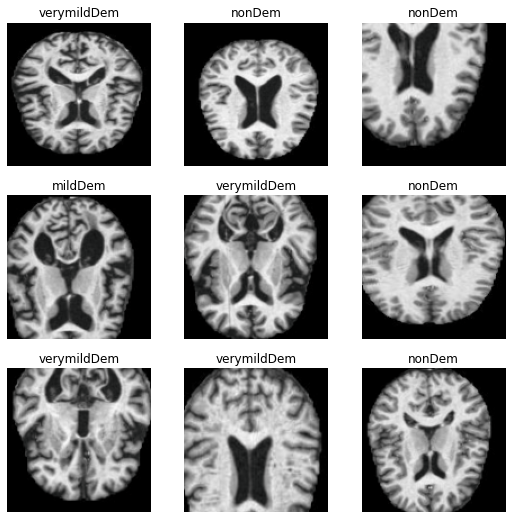

In [13]:
dls = dblock.dataloaders(PATH)
dls.show_batch()

### Loading the data with a factory method

In [14]:
data = ImageDataLoaders.from_folder(PATH, valid_pct=0.2,size=sz,bs=bs)

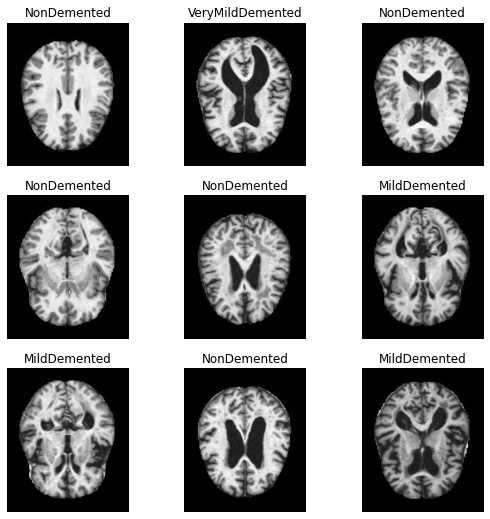

In [15]:
data.show_batch()

In [16]:
learn = cnn_learner(data, resnet34, metrics=error_rate)
learn.fine_tune(6)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.682857,1.050654,0.392188,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.912943,0.589805,0.218750,00:15
1,0.577718,0.453405,0.160938,00:15
2,0.277962,0.328838,0.108594,00:16
3,0.110591,0.116373,0.039062,00:15
4,0.033217,0.098258,0.032031,00:16
5,0.014674,0.091259,0.025781,00:15


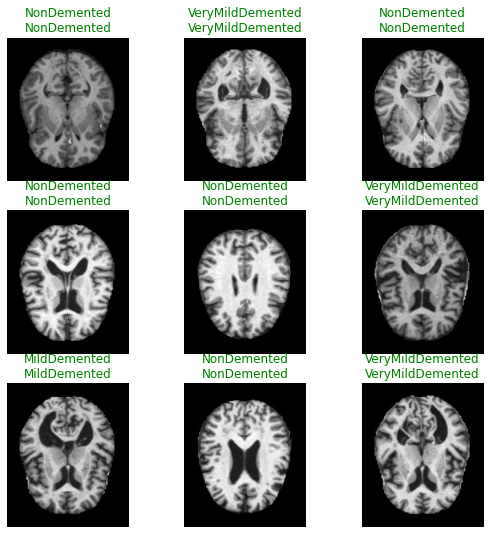

In [17]:
learn.show_results()

In [18]:
interp = Interpretation.from_learner(learn)

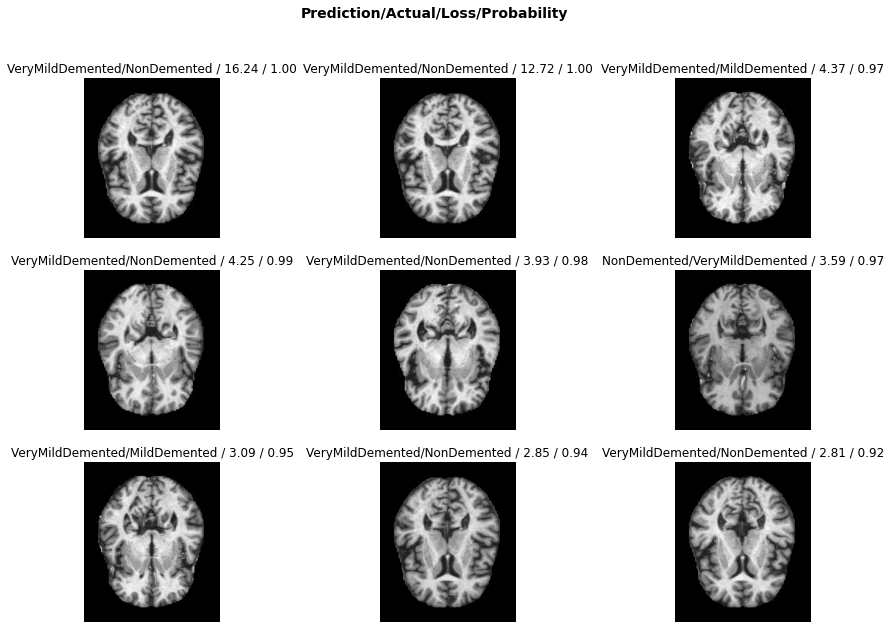

In [19]:
interp.plot_top_losses(9, figsize=(15,10))

In [20]:
learn.model_dir = "/kaggle/working"
learn.save("alzheimers")
#learn.export()

Path('/kaggle/working/alzheimers.pth')

### Importing external data and predicting with accuracy percentage

Text(0.5, 1.0, 'Prediction : VeryMildDemented\nAccuracy : 93.86 %')

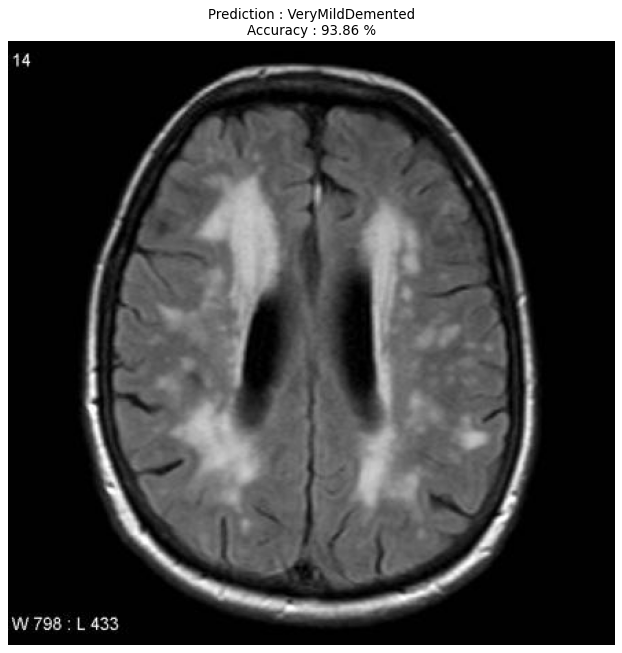

In [21]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
path = '../input/alzheimer-dementia/4ee4c494df07ac6c3ecd9b2c622c75_gallery.jpg'
pred = learn.predict(path)
test_img = Image.open(path)
plt.imshow(test_img)
plt.axis("off")
accuracy_rate = np.round(max(pred[2]).item()*100.0,2)
plt.title("Prediction : {}\nAccuracy : {} %".format(pred[0],accuracy_rate))

In [22]:
learn.export(os.path.abspath('./export.pkl'))